# Insurance Claims- Fraud Detection

The goal of this project is to build a model that can detect auto insurance fraud. The challenge behind fraud detection in machine learning is that frauds are far less common as compared to legit insurance claims. This type of problems is known as imbalanced class classification.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


There are 1000 Rows and 40 columns in the data.

In [3]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Data is a mix of numerical and String type data.

In [4]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Column '_c39' has only Null values. It's better to drop such columns.

In [5]:
df=df.drop('_c39', axis=1)

In [6]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

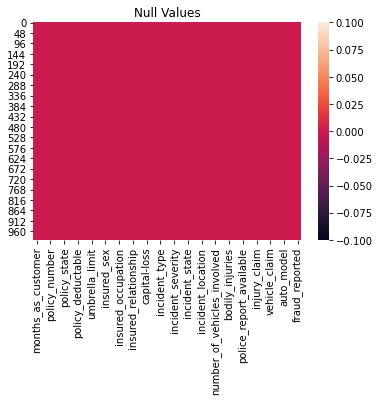

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

There are no Null values in the data anymore.

# Data Visualisation

In [8]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

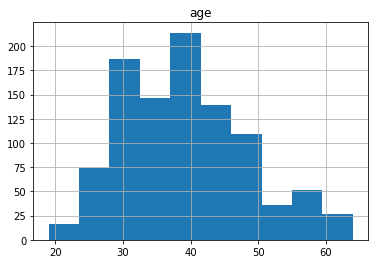

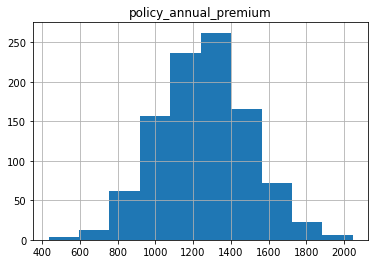

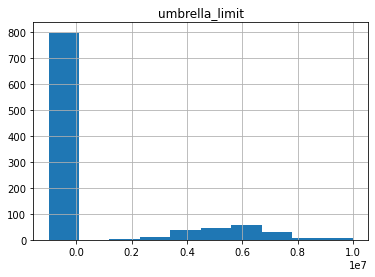

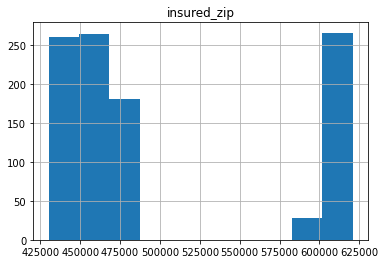

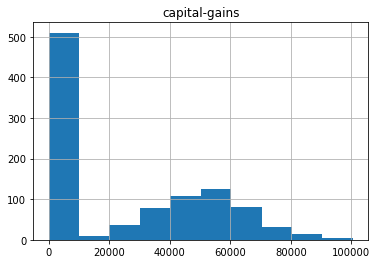

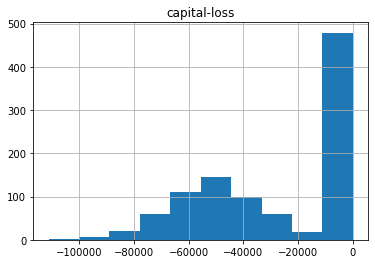

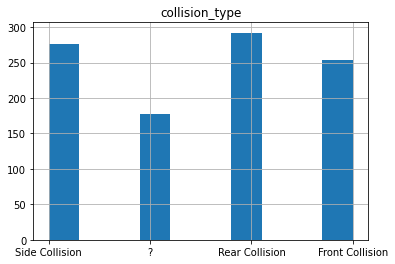

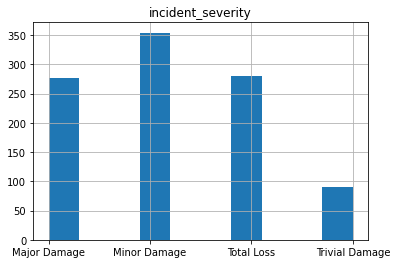

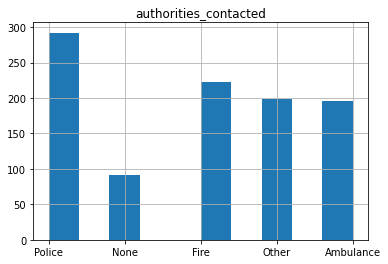

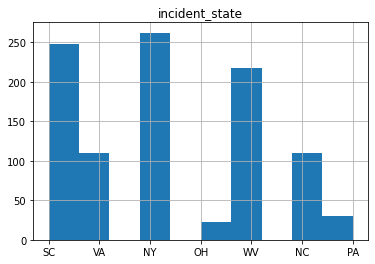

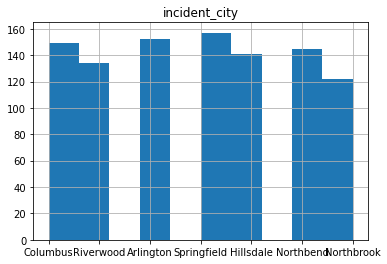

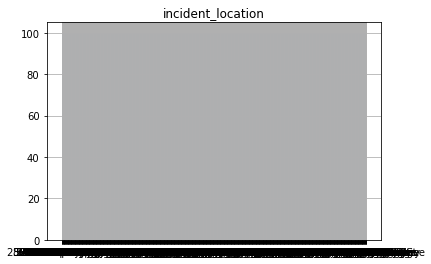

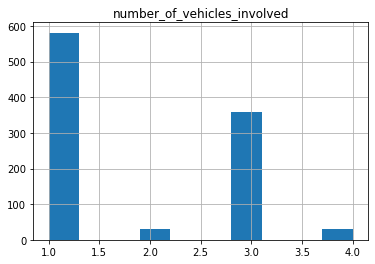

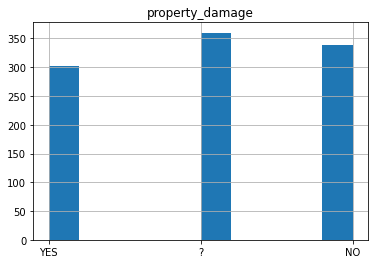

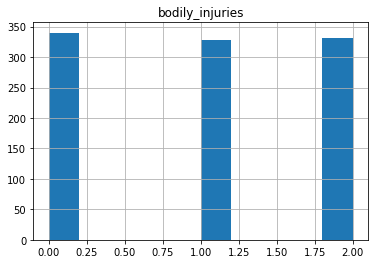

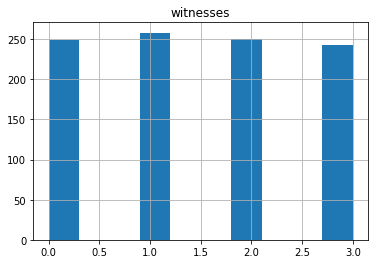

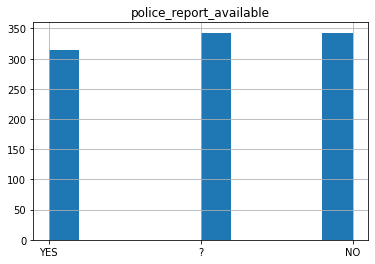

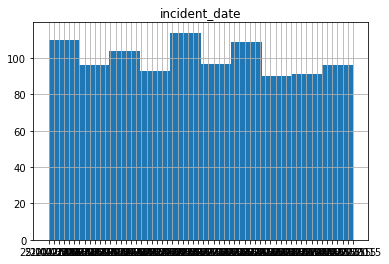

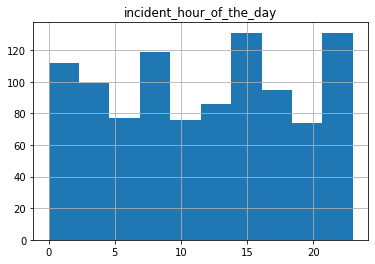

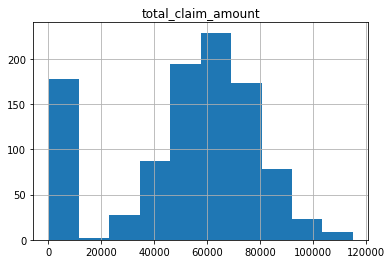

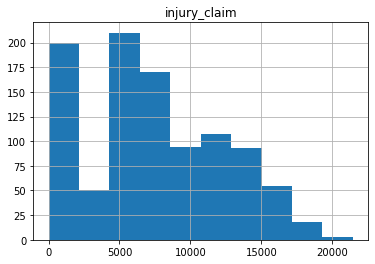

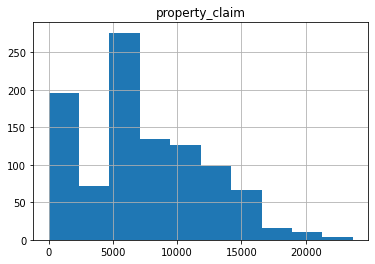

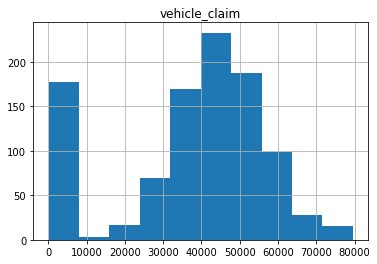

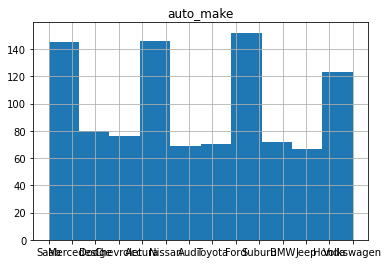

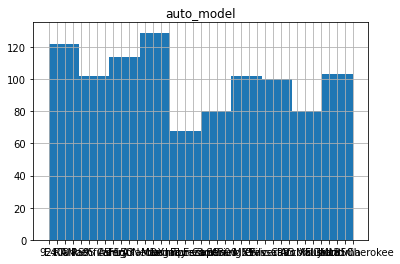

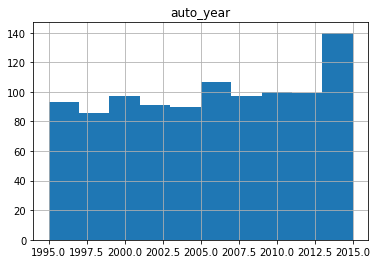

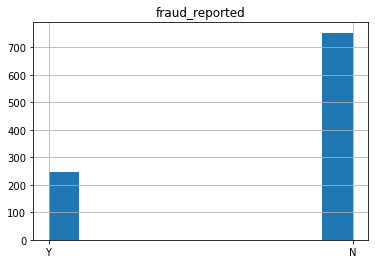

In [30]:
Index=[ 'age','policy_annual_premium', 'umbrella_limit', 'insured_zip','capital-gains', 'capital-loss', 'collision_type', 'incident_severity','authorities_contacted', 'incident_state', 'incident_city','incident_location','number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available',
       'incident_date', 'incident_hour_of_the_day','total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported']



for i in Index:
    df[i].hist(grid=True)
    plt.title(i)
    plt.show()


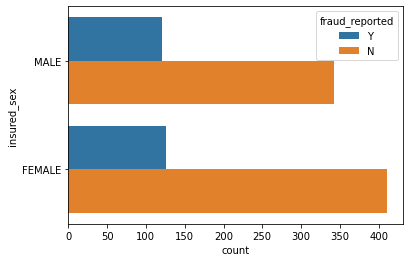

In [26]:
ax=sns.countplot(y='insured_sex', hue= 'fraud_reported',data=df)


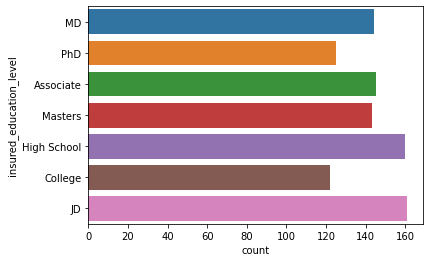

In [16]:
ax=sns.countplot(y='insured_education_level',data=df)


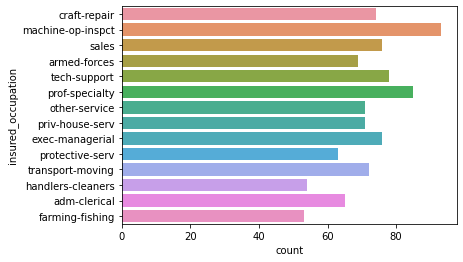

In [17]:
ax=sns.countplot(y='insured_occupation',data=df)


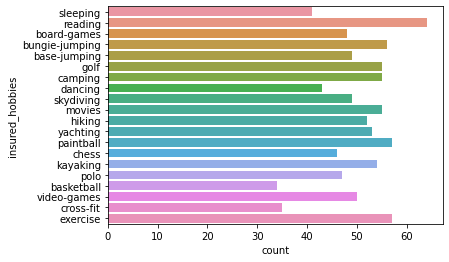

In [18]:
ax=sns.countplot(y='insured_hobbies',data=df)


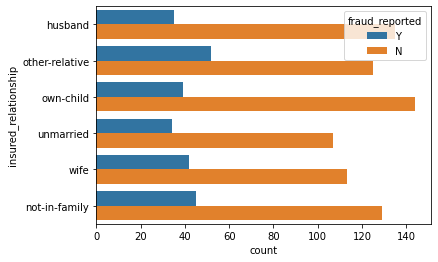

In [27]:
ax=sns.countplot(y='insured_relationship',hue='fraud_reported', data=df)

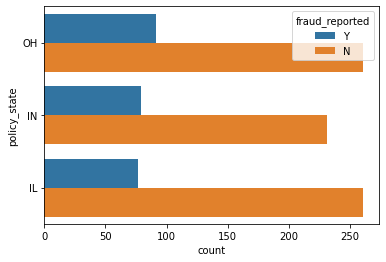

In [28]:
ax=sns.countplot(y='policy_state',hue='fraud_reported', data=df)

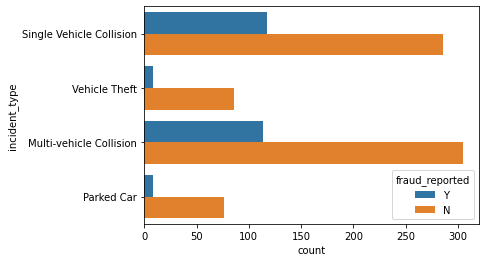

In [29]:
ax=sns.countplot(y='incident_type',hue='fraud_reported', data=df)

Observations:
    1. In columns 'Property_Damage','Police_Report_Availability','Collision_Type' there's a variable "?", which needs to be treated.
    2. Most frauds were reported from Ohio State.
    3. Fraud reports were also highest when there was a Single vehicle collision.
    4. Reading turns out to be the most common hobby amoung the insured.
    5. According to the data Police was contacted the most at times of incident, among other authorities.

In [45]:
Index= ['property_damage','police_report_available','collision_type']

from sklearn.impute import SimpleImputer

for i in Index:
    imputer = SimpleImputer(missing_values='?', strategy='most_frequent')
    df[i] = imputer.fit_transform(df[i].values.reshape(-1,1))[:,0]

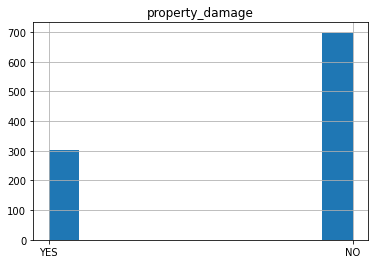

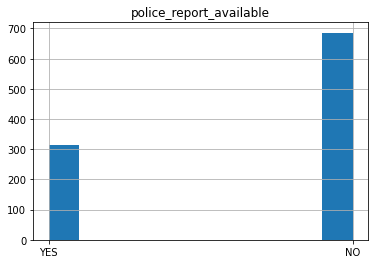

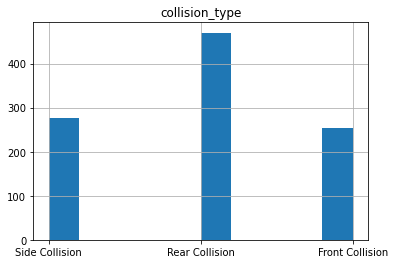

In [46]:
Index= ['property_damage','police_report_available','collision_type']

for i in Index:
    df[i].hist(grid=True)
    plt.title(i)
    plt.show()

No Missing Values present anymore.

# Encoding the data

In [48]:
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=LE.fit_transform(df[i].values.reshape(-1,1))

In [50]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day 

Data is been converted into integer data type.

# Checking Correlation

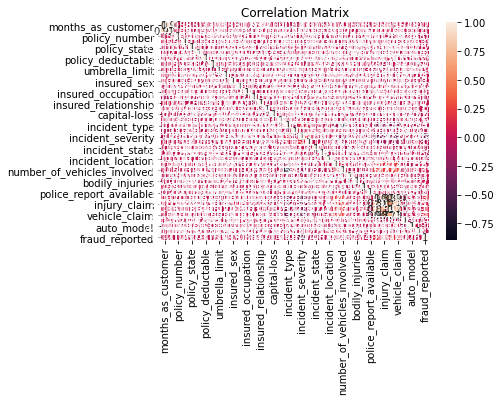

In [51]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [52]:
corr_matrix=df.corr()
corr_matrix['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
policy_bind_date               0.060642
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
property_damage                0.017202
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480


'Vehical_claim'is very highly Correlated to the target variable, whereas 'Incident_severity' is least correlated with the target variable.

# Checking for outliers

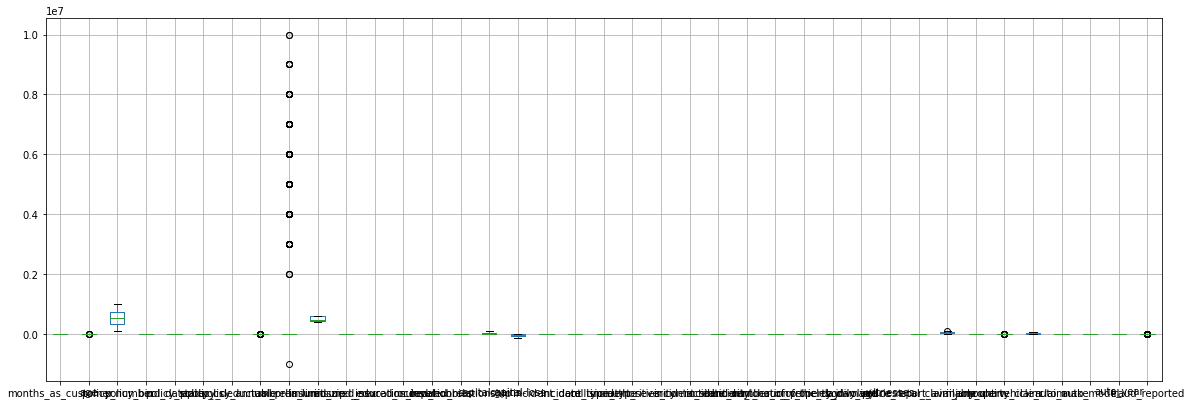

In [62]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

There are certain outliers present in column 'Umbrella_limit'.

In [63]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [64]:
x=df.drop('fraud_reported', axis =1)
y=df['fraud_reported']

# Finding best random_state

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state =i)
    LR=LogisticRegression()
    LR.fit(x_train, y_train)
    predlr=LR.predict(x_test) 
    acc=accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is ", maxAccu," on Random_state ", maxRS)

Best accuracy is  0.81  on Random_state  190


# Creating train test split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=190)

In [68]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
LR.score(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.81
[[239   2]
 [ 55   4]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       241
           1       0.67      0.07      0.12        59

    accuracy                           0.81       300
   macro avg       0.74      0.53      0.51       300
weighted avg       0.78      0.81      0.74       300



In [69]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8033333333333333
[[204  37]
 [ 22  37]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       241
           1       0.50      0.63      0.56        59

    accuracy                           0.80       300
   macro avg       0.70      0.74      0.72       300
weighted avg       0.82      0.80      0.81       300



In [70]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8033333333333333
[[220  21]
 [ 38  21]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       241
           1       0.50      0.36      0.42        59

    accuracy                           0.80       300
   macro avg       0.68      0.63      0.65       300
weighted avg       0.78      0.80      0.79       300



In [71]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8033333333333333
[[241   0]
 [ 59   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       241
           1       0.00      0.00      0.00        59

    accuracy                           0.80       300
   macro avg       0.40      0.50      0.45       300
weighted avg       0.65      0.80      0.72       300



# Cross Validation

In [72]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print('Cross validation score of LinearRegression model :',scr.mean())

Cross validation score of LinearRegression model : 0.751


In [73]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtc, x, y, cv=5)
print('Cross validation score of DecissionTreeClassifier model :',scr.mean())

Cross validation score of DecissionTreeClassifier model : 0.784


In [74]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf, x, y, cv=5)
print('Cross validation score of RandomForestClassifier model :',scr.mean())

Cross validation score of RandomForestClassifier model : 0.767


In [75]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc, x, y, cv=5)
print('Cross validation score of SVC model :',scr.mean())

Cross validation score of SVC model : 0.7529999999999999


Minimum difference in accuracy and cross validation is for DecissionTreeClassifier model.
Hence DecissionTreeClassifier is our best model.

# Hyper Parameter Tuning

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
parameters= {'max_depth':np.arange(2,15),
            'criterion':['gini','entropy']}

In [80]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [81]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [82]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [83]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [84]:
accuracy_score(y_test,GCV_pred)

0.8466666666666667

After Tuning the model 84.6% Accuracy is been achived.

In [85]:
import pickle 
filename = 'FraudDetection.pkl'
pickle.dump(rf, open( filename, 'wb' ))